In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

### Get dataset folder (replace with the dataset folder in your machine)
##### For example, dataset_path = '.'

In [2]:
import os
dataset_path = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__')))))))\
+'/NSF FPGAs for DNNs/dataset_files/dataset_emotions/train_image'

### Check size and values of a sample image using matplotlib

<class 'numpy.ndarray'>
(350, 350)
204
25


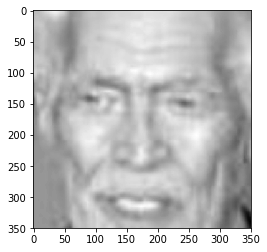

In [3]:
img = mpimg.imread(dataset_path + '/00002.jpg')
print(type(img))
plt.imshow(img, cmap='gray')
print(img.shape)
print(np.max(img))
print(np.min(img))

### But a few images have different dimensions

(82, 47, 3)


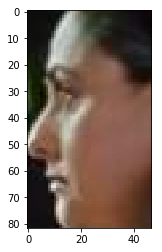

In [4]:
img = mpimg.imread(dataset_path + '/00001.jpg')
plt.imshow(img)
print(img.shape)

## Use the pillow library to manipulate images

#### Anaconda has pillow installed by default
#### If not, use
##### conda install pillow
#### OR
##### conda install -c anaconda pillow
#### If you are not using Anaconda (maybe on a cloud machine):
##### pip install pillow

In [5]:
from PIL import Image

<class 'PIL.JpegImagePlugin.JpegImageFile'>


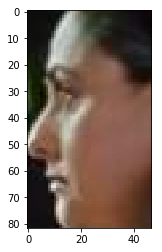

In [7]:
img = Image.open(dataset_path + '/00001.jpg')
print(type(img))
img.show() #separate window
plt.imshow(np.asarray(img)) #show image inline

### Convert color (mode RGB) images to black and white (mode L)
#### pillow uses L = R * 299/1000 + G * 587/1000 + B * 114/1000 (see https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.convert)

228
5
(82, 47)


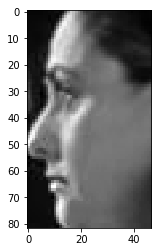

In [8]:
img = img.convert(mode = 'L')
plt.imshow(np.asarray(img), cmap='gray')
print(np.max(np.asarray(img)))
print(np.min(np.asarray(img)))
print(np.asarray(img).shape)

### Expand image to have same dimensions as other images: (350,350) (see https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.resize)

(350, 350)


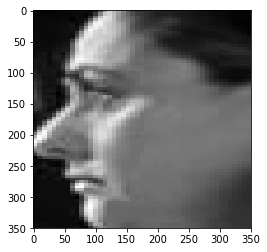

In [9]:
img = img.resize((350,350))
plt.imshow(np.asarray(img), cmap='gray')
print(np.asarray(img).shape)

### Save this new image (see https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.save)

In [10]:
img.save(dataset_path + '/00001_bw.jpg', format='JPEG')

### Remember to do this for all the non-standard images

### A few images are corrupted. It's best to discard these:

In [11]:
img = Image.open(dataset_path + '/12398.jpg')
print(type(img))
print(img.size)
plt.imshow(np.asarray(img))

/Users/souryadey92/anaconda3/envs/ee599/lib/python3.6/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


OSError: cannot identify image file '/Users/souryadey92/Google Drive/NSF FPGAs for DNNs/dataset_files/dataset_emotions/train_image/12398.jpg'

## Augmentation
#### See https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.transpose
#### See https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.crop

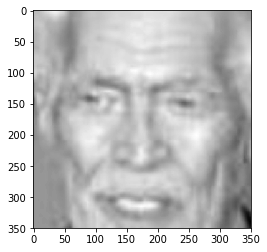

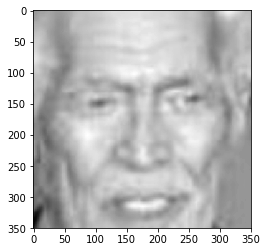

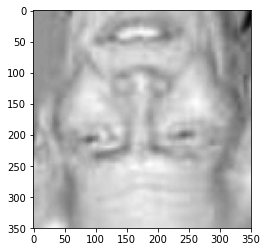

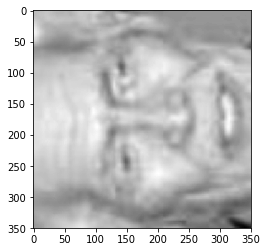

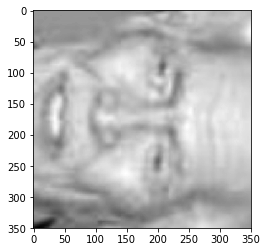

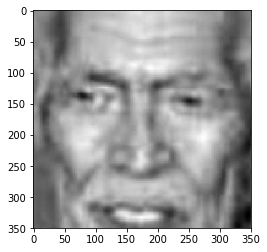

In [12]:
img = Image.open(dataset_path + '/00002.jpg')
plt.imshow(np.asarray(img), cmap='gray')
plt.show()

img_fliplr = img.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(np.asarray(img_fliplr), cmap='gray')
plt.show()

img_fliptb = img.transpose(Image.FLIP_TOP_BOTTOM)
plt.imshow(np.asarray(img_fliptb), cmap='gray')
plt.show()

img_trans = img.transpose(Image.TRANSPOSE)
plt.imshow(np.asarray(img_trans), cmap='gray')
plt.show()

img_rot = img.rotate(270)
plt.imshow(np.asarray(img_rot), cmap='gray')
plt.show()

img_crop = img.crop((20,20,330,330)) #left,upper,right,lower
img_crop = img_crop.resize((350,350))
plt.imshow(np.asarray(img_crop), cmap='gray')
plt.show()

### Remember to save any augmented images you like

## Once you have all images in standard format, make a dataset (hdf5, npz, etc)
### For xdata, you can use mpimg.imread since it returns numpy arrays directly
### For one-hot ydata, read the CSV file and extract the labels
#### There are different ways to do this, see Google and Stack Overflow
#### https://docs.python.org/3.6/tutorial/inputoutput.html#reading-and-writing-files
#### https://stackoverflow.com/questions/24662571/python-import-csv-to-list

## Formatting for Keras
### CNN input in Keras must have dimensions (width,height,channels)

In [13]:
img = mpimg.imread(dataset_path + '/00002.jpg')
img = img.reshape(350,350,1)
print(img.shape)

(350, 350, 1)


## Preprocessing and normalization suggestions
### Divide pixels by 255 (minmax normalization)

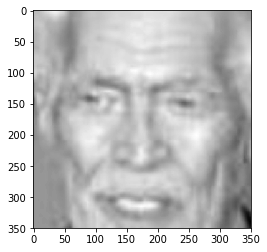

In [16]:
img = mpimg.imread(dataset_path + '/00002.jpg')
plt.imshow(img, cmap='gray')
plt.show()
img = img/255
# plt.imshow(img, cmap='gray')
# plt.show()

### Global contrast normalization (for more options, see page 450 of https://www.deeplearningbook.org/contents/applications.html)

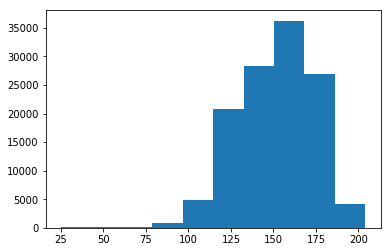

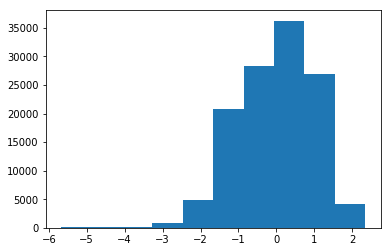

In [14]:
img_gcn = (img-np.mean(img))/np.std(img)
plt.hist(img.flatten())
plt.show()
plt.hist(img_gcn.flatten())
plt.show()

#### Notice how the global contrast normalized image has a wider spread of pixel values